Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sololeveler11","key":"2b832fe6ef8168124254af57aaf90165"}'}

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!ls


kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [1]:
import zipfile
import os

# Define the path to the zip file
zip_path = "final.zip"

# Create a directory to extract the dataset
extract_dir = "plant_diseases_ka_data"
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optional: Remove the zip file to save space
os.remove(zip_path)


In [2]:
import os



In [3]:
!pip install tensorflow


In [4]:
# Step 3: Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [5]:
# Step 4: Data Preprocessing
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_diseases_ka_data/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_diseases_ka_data/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 15889 files belonging to 9 classes.
Found 3994 files belonging to 9 classes.


In [13]:
# Step 5: Building Model
cnn = tf.keras.models.Sequential()

# Building Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nhistory = cnnn.fit(\n    data_augmentation(train_images),  # Apply augmentation to training data\n    train_labels,\n    batch_size=32,\n    epochs=100,  # Set high, early stopping will prevent overfitting\n    validation_data=(val_images, val_labels),\n    callbacks=[early_stopping, reduce_lr]\n)\n'

In [15]:
# Step 6: Compiling and Training Phase
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

# Step 7: Train the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8706 - loss: 0.3750 - val_accuracy: 0.9011 - val_loss: 0.2732
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9263 - loss: 0.2137 - val_accuracy: 0.9299 - val_loss: 0.1975
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.9475 - loss: 0.1541 - val_accuracy: 0.9414 - val_loss: 0.1637
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9588 - loss: 0.1195 - val_accuracy: 0.9429 - val_loss: 0.1745
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9653 - loss: 0.1094 - val_accuracy: 0.9524 - val_loss: 0.1381
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9694 - loss: 0.0921 - val_accuracy: 0.9647 - val_loss: 0.1089
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9754 - loss: 0.0708 - val_accuracy: 0.9542 - val_loss: 0.1321
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9787 - loss: 0.0623 - 

In [18]:
  # Step 9: Saving Model
cnn.save('trained_plant_disease_model_final.keras')

# Recording History in JSON
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

print(training_history.history.keys())

train_accuracy = training_history.history['accuracy'][-1]  # Get last epoch's accuracy
val_accuracy = training_history.history['val_accuracy'][-1]

# Print Training and Validation Accuracy
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Training Accuracy: 0.9815
Validation Accuracy: 0.9727


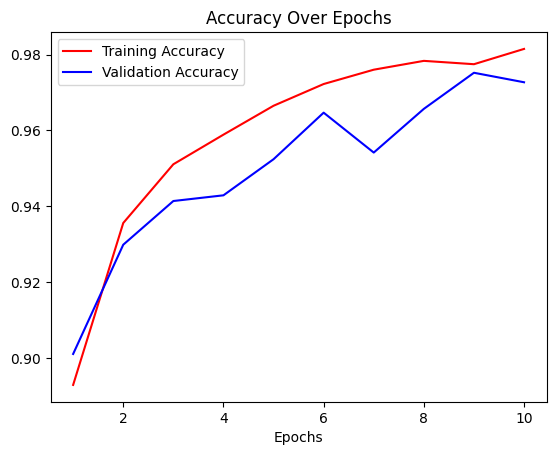

In [19]:
# Accuracy Plot
epochs_range = range(1, len(training_history.history['accuracy']) + 1) # Changed this line
plt.plot(epochs_range, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs_range, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [20]:
mkdir classification_project && cd classification_project && mkdir data models notebooks src && touch README.md requirements.txt

Found 3994 files belonging to 9 classes.
3994/3994 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       440
                                   Apple___healthy       0.99      0.95      0.97       502
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.88      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.94       477
                            Corn_(maize)___healthy       1.00      0.99      0.99       465
                                            random       1.00      0.98      0.99     

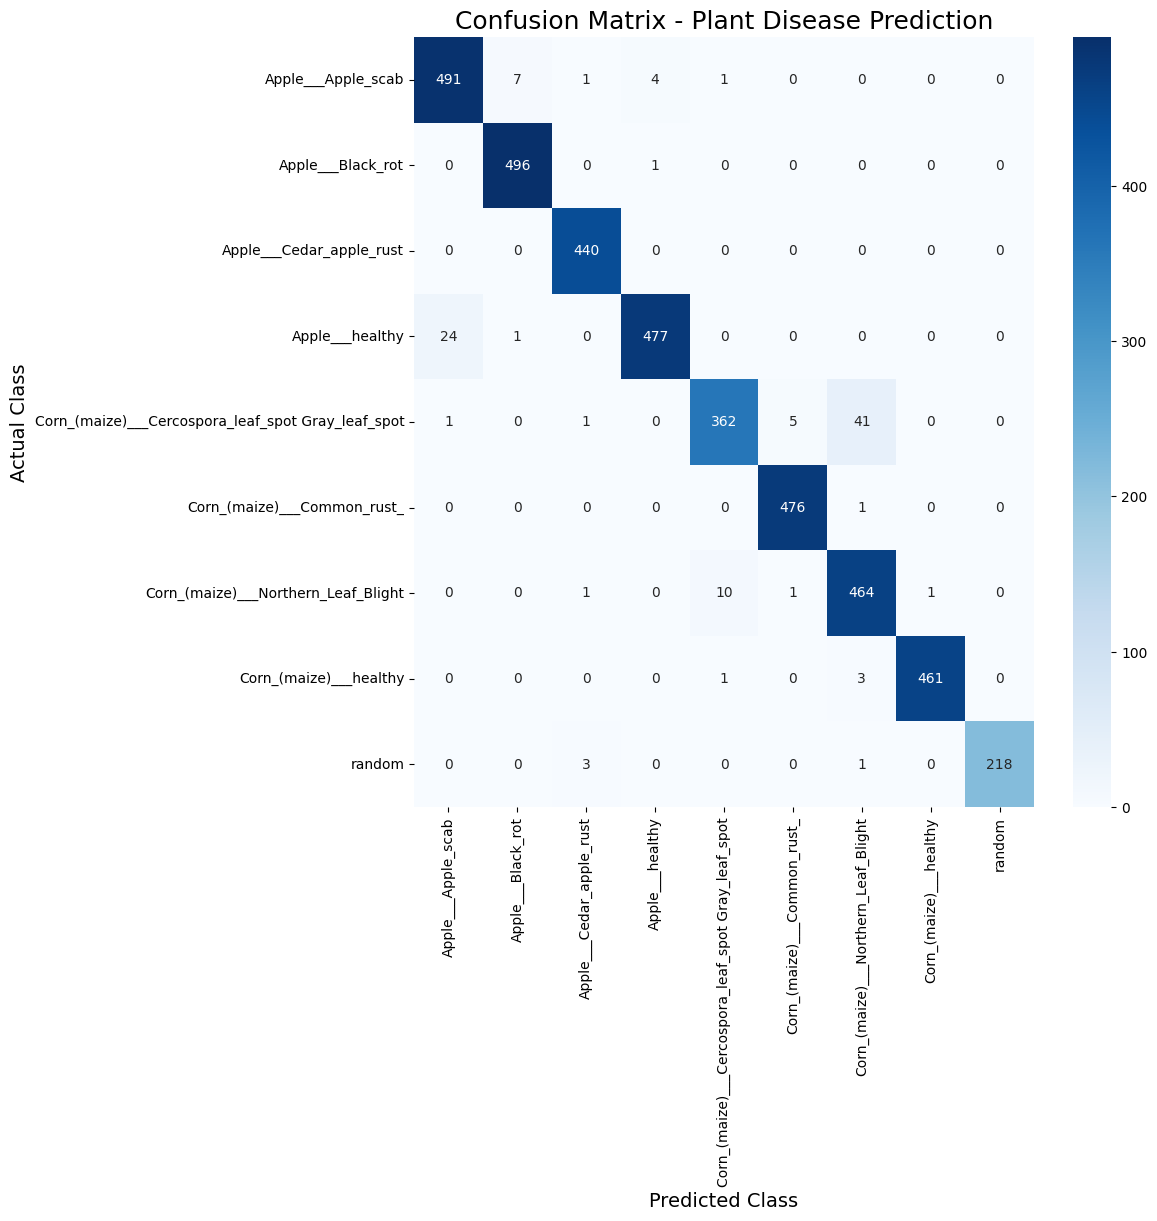

In [21]:
# ... (code from cell ipython-input-12-99b08e0eb657) ...

# Evaluation Metrics
class_name = validation_set.class_names
valid_path = '/content/plant_diseases_ka_data/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

from sklearn.metrics import classification_report
report = classification_report(Y_true, predicted_categories, target_names=class_name)
print(report)


# Confusion Matrix
cm = confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix - Plant Disease Prediction', fontsize=18)
plt.show()

In [ ]:
cnn.save("plant_disease_cnn_modal_1.keras")


In [ ]:
test_dir = os.path.join(extract_dir, "test")
#The original path had an extra 'New Plant Diseases Dataset(Augmented)' in it.
# This updated path directly accesses the test directory within the extracted dataset.

In [ ]:
report = classification_report(y_true, y_pred_classes, target_names=classes)
print(report)

NameError: name 'y_true' is not defined

#TESTING

In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_path = "/content/123.zip"  # Make sure this path is correct

# Create a directory to extract the dataset
extract_dir = "valid_data"
os.makedirs(extract_dir, exist_ok=True)

# Check if the file exists and is a valid zip file
if os.path.exists(zip_path) and zipfile.is_zipfile(zip_path):
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # Optional: Remove the zip file to save space
    os.remove(zip_path)
else:
    print(f"Error: File not found or not a valid zip file: {zip_path}")

In [20]:
import numpy as np
import tensorflow as tf
#The 'ImageDataGenerator' class should be imported from 'tensorflow.keras.preprocessing.image'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [22]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_diseases_ka_data/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3994 files belonging to 9 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'random']


In [23]:
cnn = tf.keras.models.load_model('/content/trained_plant_disease_model.keras')

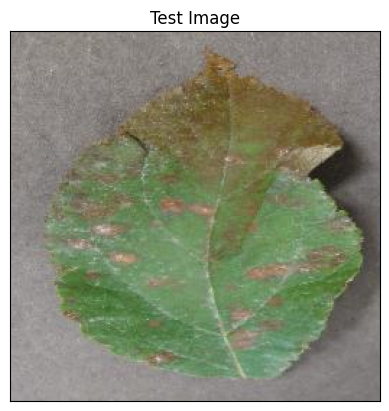

In [25]:
#Test Image Visualization
import cv2
image_path = '/content/AppleCedarRust4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


In [27]:
print(predictions)

[[2.4150606e-05 5.5007949e-06 9.9994147e-01 7.3771560e-07 2.7378672e-05
  1.0220003e-07 3.3660478e-07 1.2553321e-08 2.5225182e-07]]


In [28]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


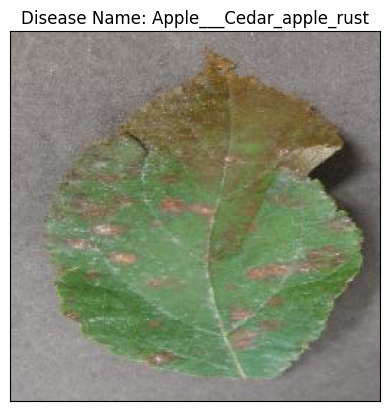

In [29]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

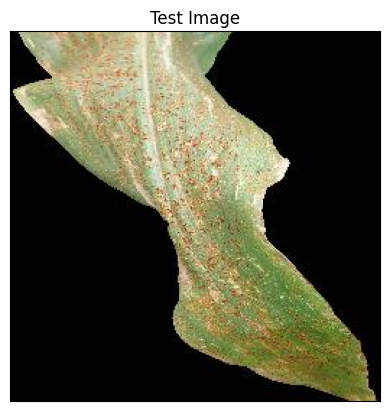

In [30]:
#Test Image Visualization
import cv2
image_path = '/content/CornCommonRust3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [32]:
print(predictions)

[[2.4947915e-12 8.6189384e-21 4.5920419e-18 4.3901637e-22 1.2262951e-17
  1.0000000e+00 3.7706699e-20 4.5980847e-20 6.2742434e-14]]


In [33]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

5


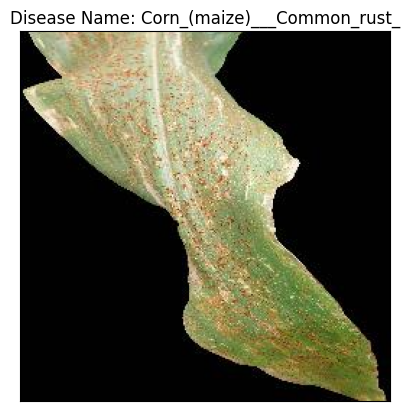

In [34]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [1]:
#Test Image Visualization
import cv2
image_path = '/content/nasturtium-leaves-of-different-green-tones-natural-plant-background-2D38AKT.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [2]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

NameError: name 'tf' is not defined

In [3]:
print(predictions)

NameError: name 'predictions' is not defined

In [4]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


NameError: name 'np' is not defined

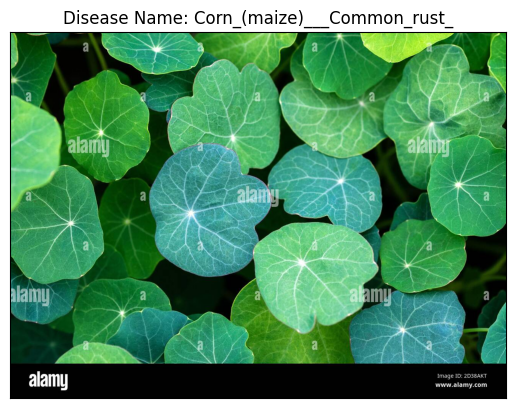

In [69]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()